# Convolutional Neural Networks: Mood classifier and Sign language classifier

In this project:
- A mood classifer using the TF Keras `Sequential API` (Binary classification)
- A ConvNet to identify sign language digits using the TF Keras `Functional API` (Multiclass classification)

`Sequential API`: Layers are connected in one linear way (single line)

`Functional API`: More freedom in connecting layers and skipping some. More like a graph as opposed to a single line.


In [1]:
# to suppress TF warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

## Happy/ not happy binary classifier (Sequential model)

### Load, split and examine the Data

Dataset: Images of people faces

Labels: 1: happy, 0: not happy 

Task: Binary classification (happy or not) using a ConvNet.

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)
possible classes:  [0 1]
A sample image: 

label is [1]


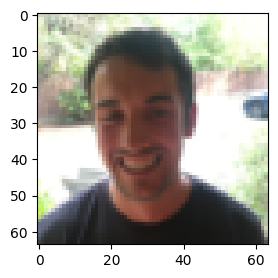

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ("possible classes: ", classes)

# Display a sample image
print("A sample image: \n")
plt.figure(figsize=(3,3))
index = 12
print("label is", Y_train[index])
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()


### Model

Model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`.

Parameters:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - FC ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 

In [13]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    # Alternatively can be done gradually using .add()
    model = tf.keras.Sequential([
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64,64,3)),
            tfl.Conv2D(32, (7, 7), strides=(1, 1)),
            tfl.BatchNormalization(axis=3),
            tfl.ReLU(),
            tfl.MaxPool2D(),
            tfl.Flatten(),
            tfl.Dense(units=1, activation='sigmoid')            
        ])
    
    return model

In [18]:
# Create model
happy_model = happyModel()
# Print a summary for each layer(function from test_utils.py)
for layer in summary(happy_model):
    print(layer)

# Compile model
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
# Check model summary
happy_model.summary()

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_4 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                       

In [20]:
# Fit (train) model
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 5s 72ms/step - loss: 1.3977 - accuracy: 0.6600
Epoch 2/10
38/38 [==============================] - 3s 68ms/step - loss: 0.2053 - accuracy: 0.9167
Epoch 3/10
38/38 [==============================] - 2s 58ms/step - loss: 0.1316 - accuracy: 0.9550
Epoch 4/10
38/38 [==============================] - 2s 56ms/step - loss: 0.0925 - accuracy: 0.9650
Epoch 5/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1029 - accuracy: 0.9667
Epoch 6/10
38/38 [==============================] - 2s 57ms/step - loss: 0.1025 - accuracy: 0.9683
Epoch 7/10
38/38 [==============================] - 2s 56ms/step - loss: 0.0975 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1515 - accuracy: 0.9317
Epoch 9/10
38/38 [==============================] - 2s 58ms/step - loss: 0.0982 - accuracy: 0.9650
Epoch 10/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1556 - accuracy: 0.9433


In [21]:
# Evaluate model against test data set 
# (prints the value of the loss function and the performance metrics specified in the compile step)
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 41ms/step - loss: 0.2072 - accuracy: 0.9400


[0.2071557641029358, 0.9399999976158142]

5/5 [==============================] - 0s 44ms/step
0.06
prediction: [1] label: [0]


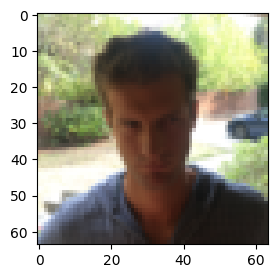

In [40]:
# show some mistakes
preds = happy_model.predict(X_test)
yhat = np.where(preds > 0.5, 1, 0)
mistaken_idx = np.where(yhat!=Y_test)[0]

plt.figure(figsize=(3,3))
index = mistaken_idx[2]
plt.imshow(X_test[index]) #display sample training image
print("prediction:", yhat[index], "label:", Y_test[index])
plt.show()


## Sign language multi-class classifier (Functional API)

### Load, split and examine the data

Data set: A collection of hand signs representing numbers from 0 to 5.

Labels: 0 ~ 5

X_train shape: (1080, 64, 64, 3)
Original Y_train shape: (1, 1080)
One Hot encoded Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)
possible classes  [0 1 2 3 4 5]
sample image:
y = 4


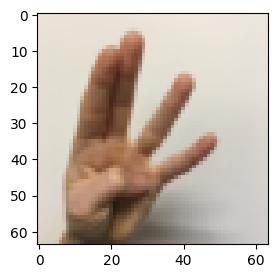

In [13]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert labels to one hot encoding (original labels are just single values 0~5)
Y_train = np.eye(6)[Y_train_orig.flatten()] # np.eye(n) : nxn identity matrix
Y_test = np.eye(6)[Y_test_orig.flatten()] # flatten: ensures indices array is a rank1 array(a list like vector)
# np.eye(n)[indices] --> (indices_length x n) matrix with one 1 at each row at the passed indices

print ("X_train shape: " + str(X_train.shape))
print ("Original Y_train shape:", Y_train_orig.shape)
print ("One Hot encoded Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ("possible classes ", classes)

# Example of an image from the dataset
index = 9
plt.figure(figsize=(3,3))
plt.imshow(X_train_orig[index])
print("sample image:")
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### Model (Functional API)

This model can be built using the sequenial API, but will use the Functional API for demonstration purposes.

Model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`

In functional API, every layer takes the previous layer as the input --> The final layer contains all other layers wrapped inside.

Parameters:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation. 

In [14]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(8, (4, 4), strides=(1, 1), padding='SAME')(input_img)

    A1 = tfl.ReLU()(Z1)
    
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8,8), padding='SAME')(A1)

    Z2 = tfl.Conv2D(16, (2, 2), strides=(1, 1), padding='SAME')(P1)

    A2 = tfl.ReLU()(Z2)

    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4,4), padding='SAME')(A2)

    F = tfl.Flatten()(P2)

    outputs = tfl.Dense(units=6, activation='softmax')(F)    

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [15]:
# Create model
conv_model = convolutional_model((64, 64, 3))
# Compile model
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
# Check summary of model
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [26]:
# batch and prepare data combining both examples and labels
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

# Fit (train) model
# X, Y are fed in one input as train_dataset
# validation_data: data on which to evaluate the model (loss, accuracy metrics..etc)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset, verbose=False)

In [17]:
# Evaluate
# Corresponds to the last values of each metric in the history object (and the .fit() output)
conv_model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 11ms/step - loss: 0.4420 - accuracy: 0.8500


[0.44201451539993286, 0.8500000238418579]

In [25]:
# Check the history object
# history object is the output of .fit(). It's a dict that stores losses and metrics
# the line below prints whole object
#history.history

#print the last epoch metrics. Same as evaluate() output for test data.
print("Train loss:", history.history['loss'][-1], "\nTrain accuracy:", history.history['accuracy'][-1])
print("Test (eval) loss:", history.history['val_loss'][-1], "\nTest (eval) accuracy:", history.history['val_accuracy'][-1])

Train loss: 0.34671005606651306 
Train accuracy: 0.8990740776062012
Test (eval) loss: 0.4420144855976105 
Test (eval) accuracy: 0.8500000238418579


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

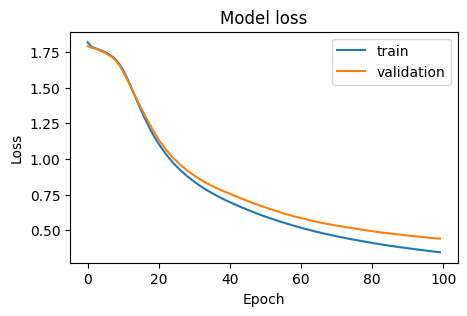

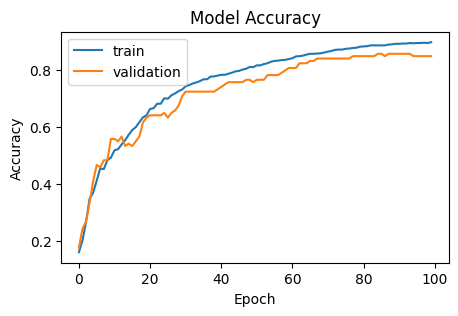

In [20]:
# Plot training and test data metrics
pd.options.mode.chained_assignment = None  # Avoid pandas warning messages
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(5,3)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(5,3)).set(xlabel='Epoch',ylabel='Accuracy')